In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y) # 학습을 하게됨

clf.predict([[2., 2.]])

array([1])

In [3]:
clf.predict_proba([[2., 2.]])   # 비율 출력

array([[0., 1.]])

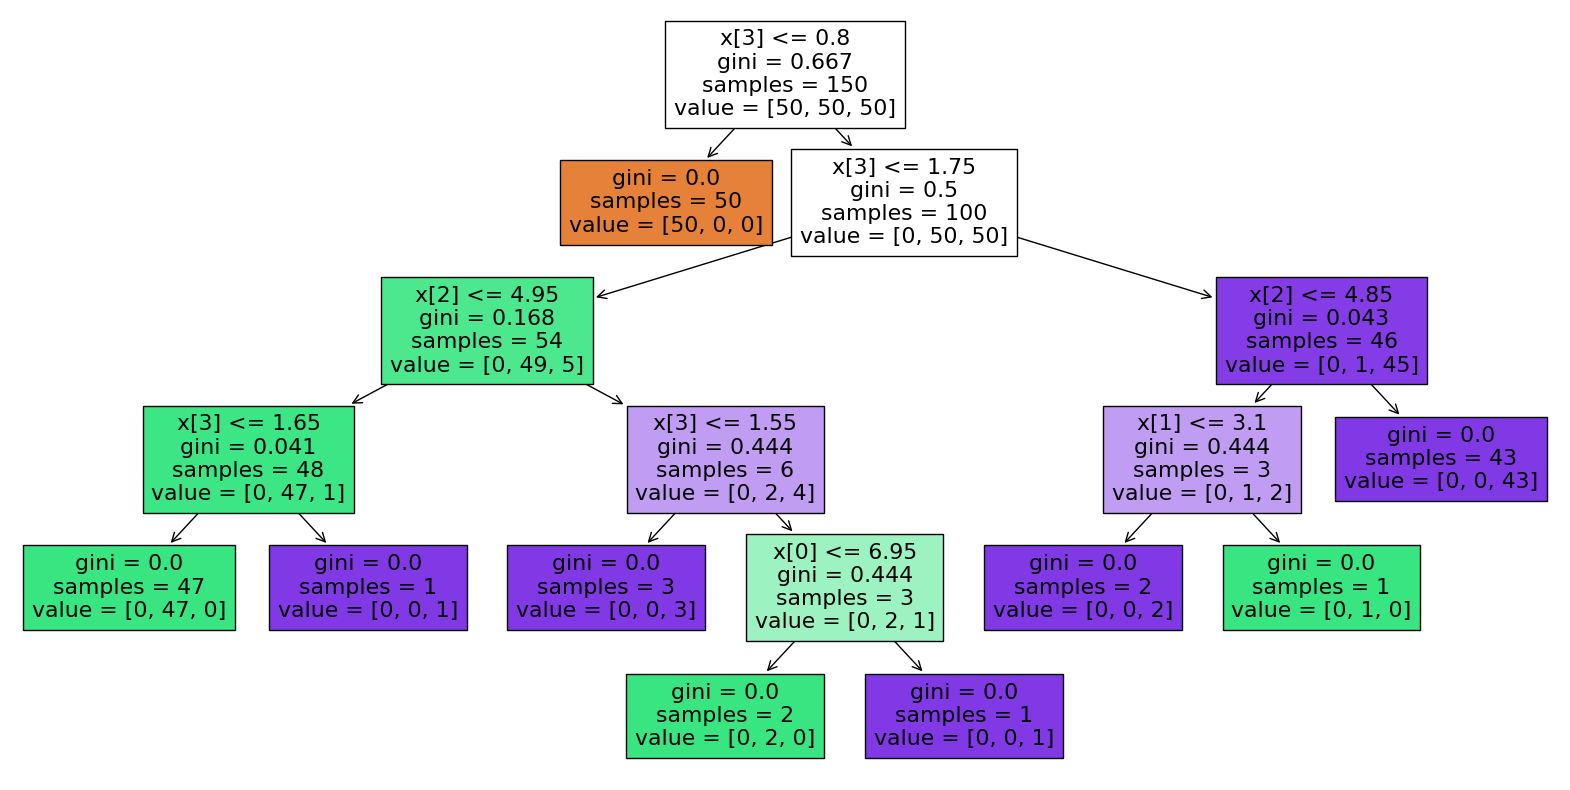

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y), filled=True)

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [36]:
df.head()   # 모두 숫자로 돼있어서 전처리가 필요없음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# 수치형 변수를 범주형 변수로 바꾸기
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [57]:
# One-Hot-Encoding
df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >= 25) & (df['Age'] <= 60)
df['Age_high'] = df['Age'] > 60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

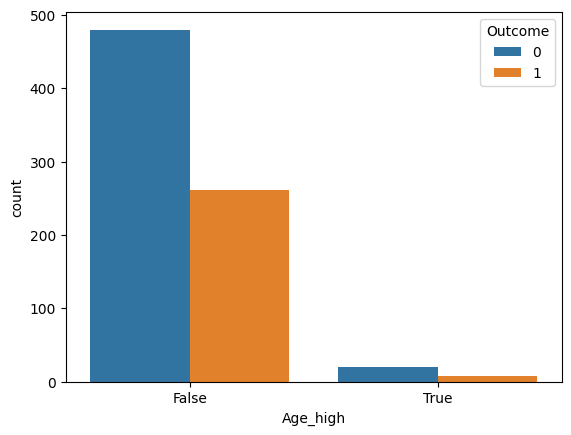

In [60]:
sns.countplot(data=df, x='Age_high', hue='Outcome')

In [61]:
split_count = int(df.shape[0] * 0.8)  # 행의 값에 0.8을 곱해줌 (전체 데이터를 8:2로 나누기 위해)
split_count

614

In [62]:
train = df[:split_count].copy()    # 0~613번까지 가져옴, 전처리를 위해 copy로 가져오는 것이 좋음
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0,False,True,False,False
610,3,106,54,21,158,30.9,0.292,24,0,False,True,False,False
611,3,174,58,22,194,32.9,0.593,36,1,False,False,True,False
612,7,168,88,42,321,38.2,0.787,40,1,True,False,True,False


In [63]:
test = df[split_count:].copy()
test.shape

(154, 13)

In [65]:
feature_names = train.columns.tolist()  # 마지막 컬럼인 outcome만 제외하고 가져옴
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high']

In [66]:
label_name = 'Outcome'  # outcome을 저장해줌
label_name

'Outcome'

In [68]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 10)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
0,148,72,35,0,33.6,0.627,False,False,True,False
1,85,66,29,0,26.6,0.351,False,False,True,False
2,183,64,0,0,23.3,0.672,True,False,True,False
3,89,66,23,94,28.1,0.167,False,True,False,False
4,137,40,35,168,43.1,2.288,False,False,True,False


In [69]:
train[label_name]   # 당뇨병이면 1, 아니면 0인 값들

0      1
1      0
2      1
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [70]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [71]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 10)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
614,138,74,26,144,36.1,0.557,True,False,True,False
615,106,72,0,0,25.8,0.207,False,False,True,False
616,117,96,0,0,28.7,0.157,False,False,True,False
617,68,62,13,15,20.1,0.257,False,True,False,False
618,112,82,24,0,28.2,1.282,True,False,True,False


In [72]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [73]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)   # 예측한 결과
y_predict[:5]

array([1, 0, 0, 0, 1])

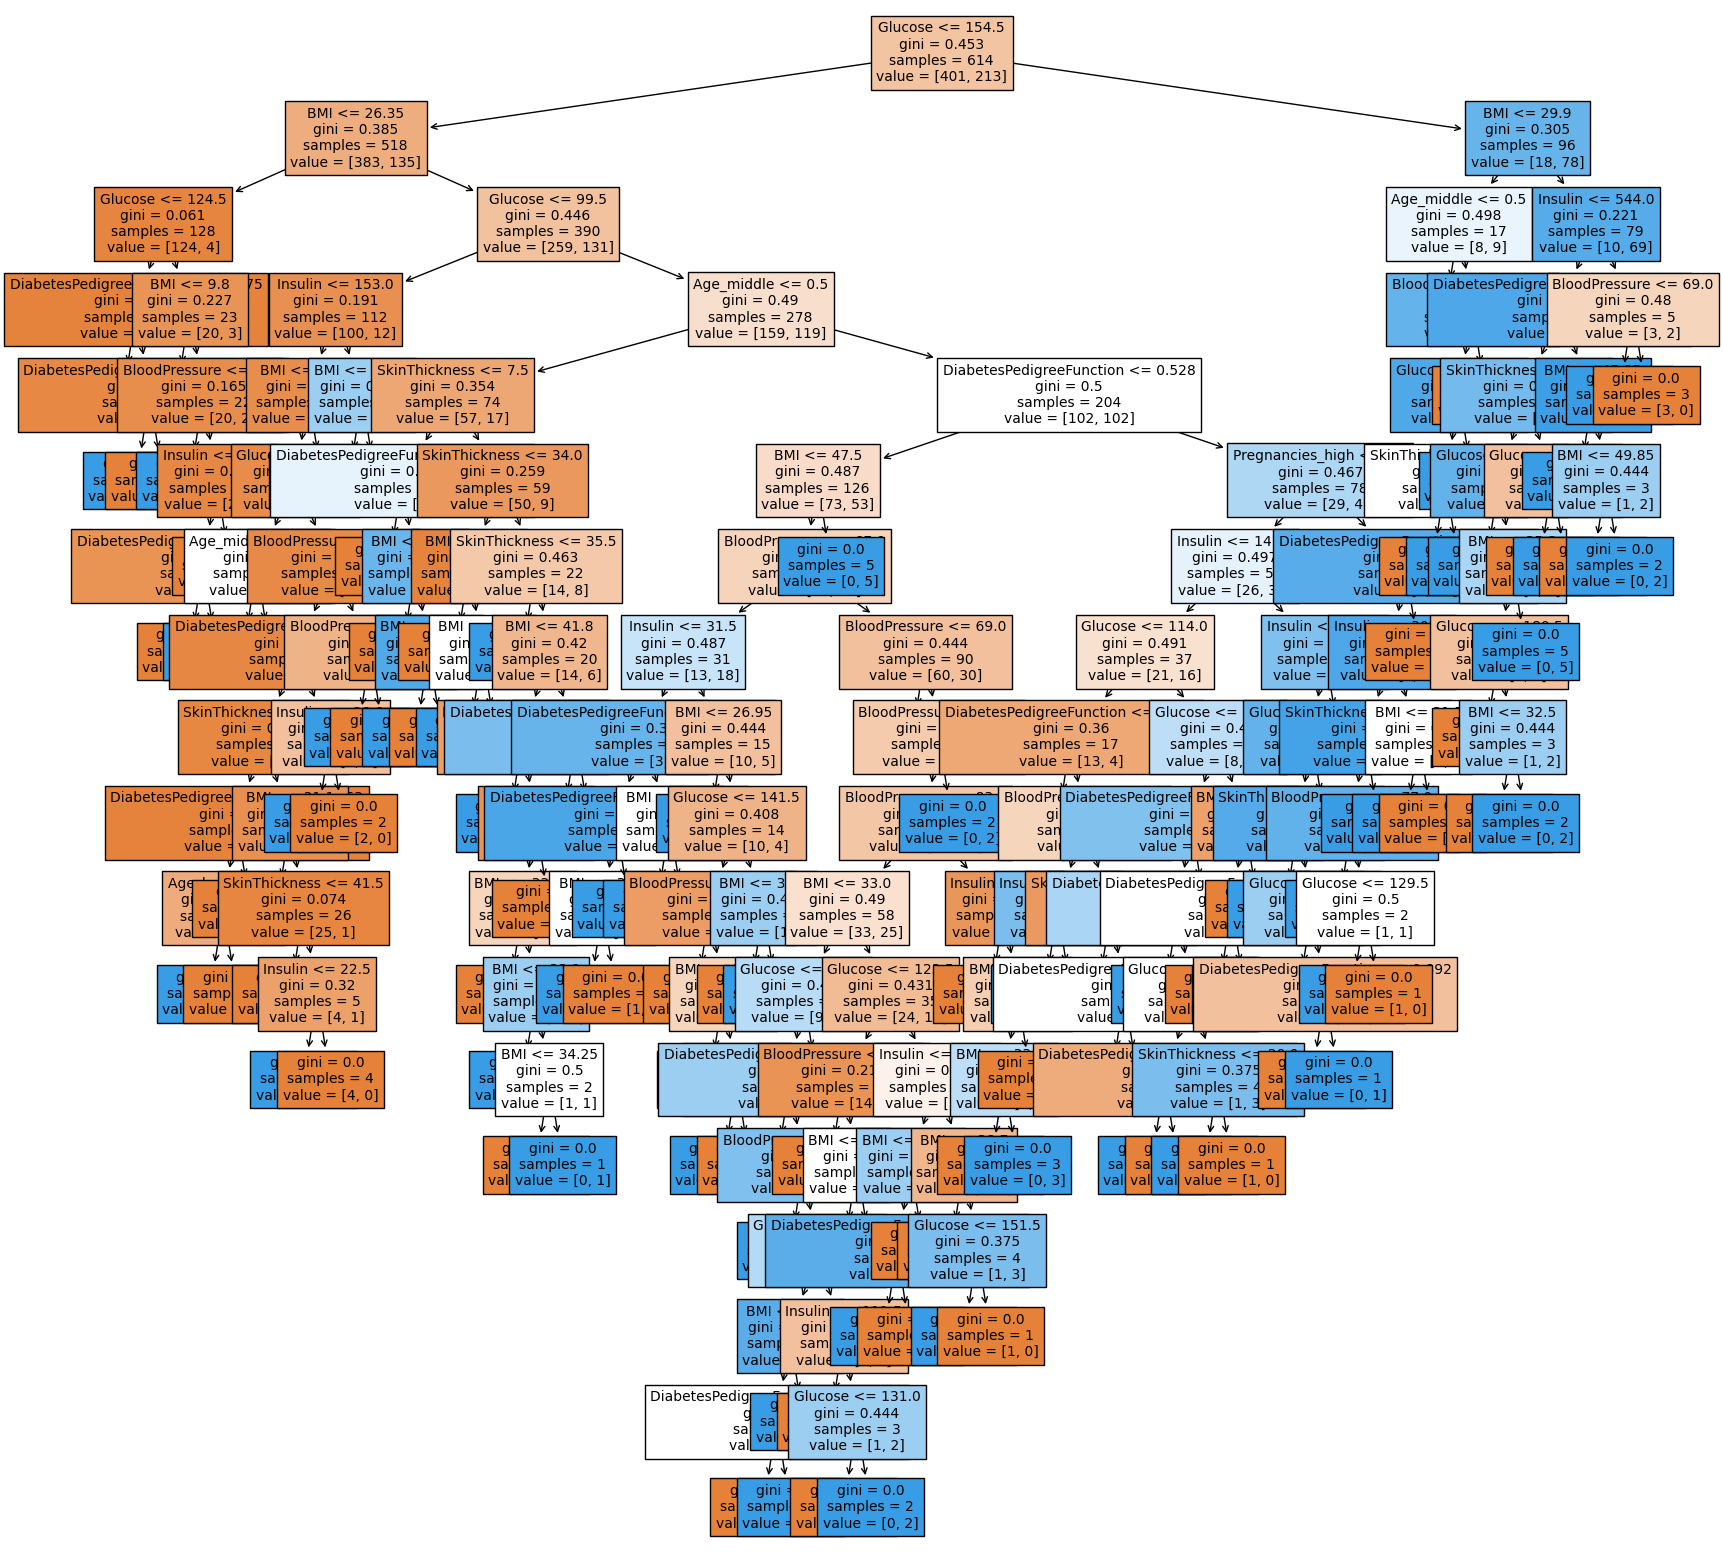

In [74]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)   # text로 tree를 나타내줌

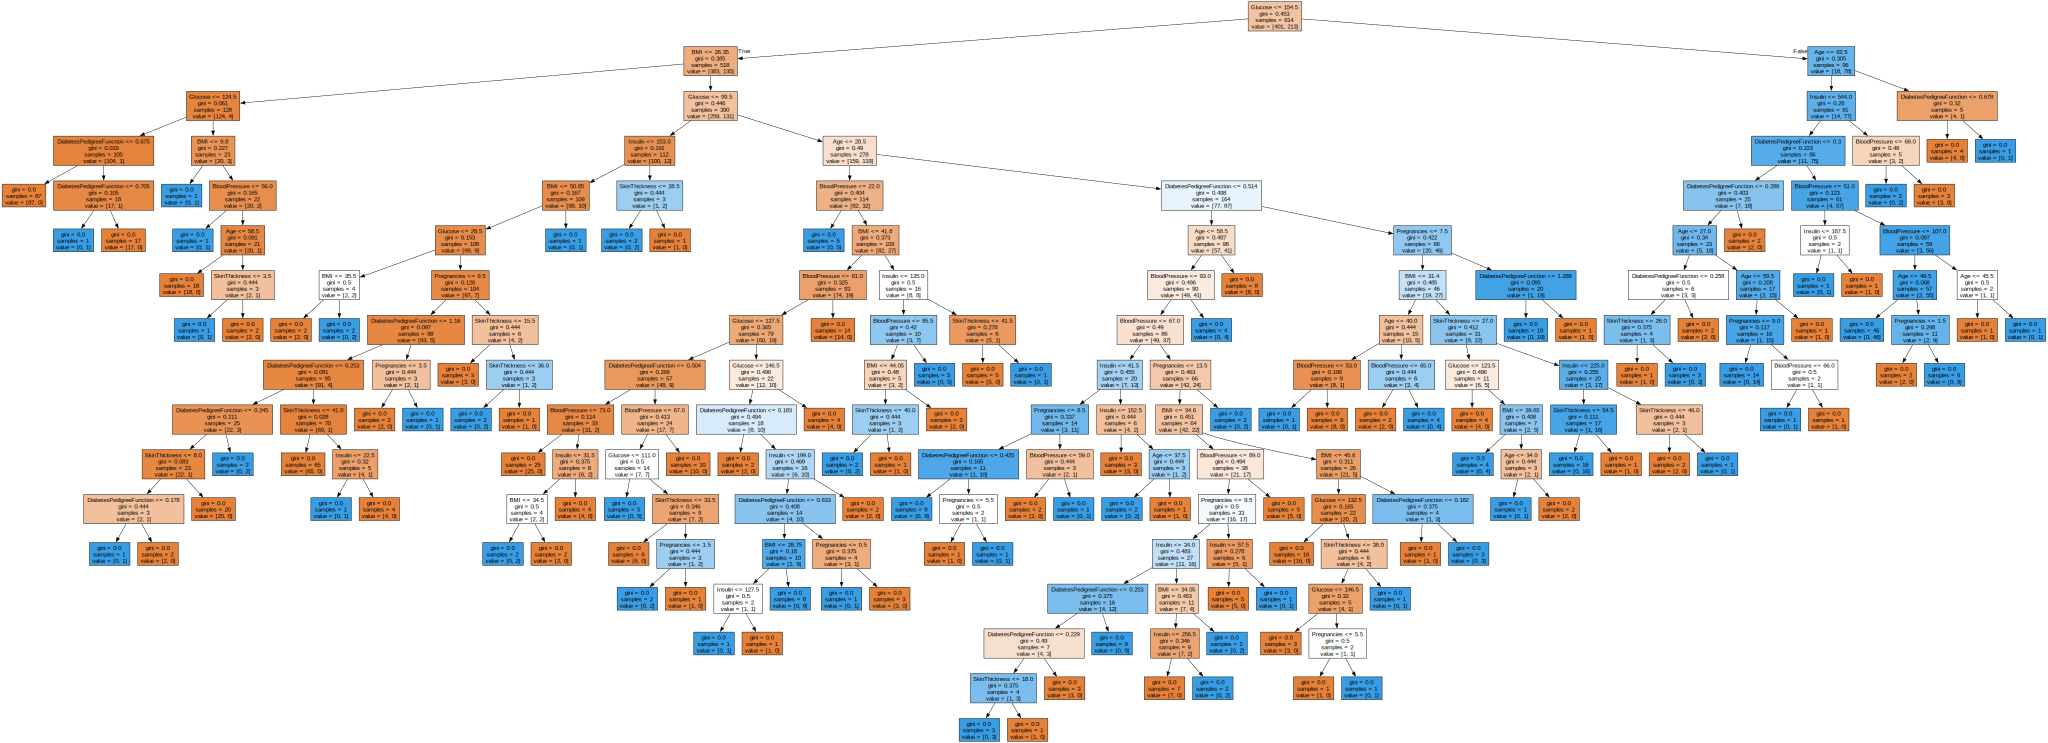

In [20]:
import graphviz
from sklearn.tree import export_graphviz

# gini계수가 0이면 트리 생성을 멈춤

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)

graphviz.Source(dot_tree)

In [75]:
# feature의 중요도 추출
model.feature_importances_

array([0.3290923 , 0.09238276, 0.05229419, 0.07887323, 0.25952135,
       0.11584983, 0.01220961, 0.00539145, 0.05438527, 0.        ])

<Axes: >

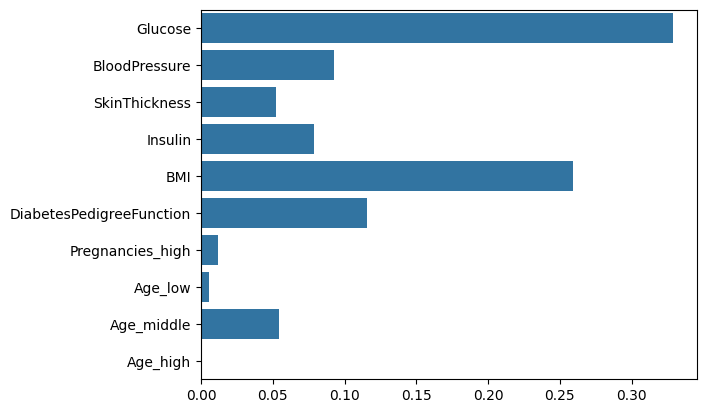

In [76]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [77]:
# 실제값 - 예측값을 했을 때 0이 나오면 예측이 성공한 것
# 절대값을 씌웠을 때 값이 1이면 다르게 예측을 한 것

abs(y_test - y_predict).sum()   # 예측을 다르게 한 수를 구함

53

In [78]:
abs(y_test - y_predict).sum() / len(y_test) # 28%를 잘못 예측함

0.34415584415584416

In [79]:
# 예측의 정확도를 직접 구함
# 정확도 수치 향상
diff_count = abs(y_test - y_predict).sum()
(len(y_test) - diff_count) / len(y_test) * 100

65.5844155844156

In [80]:
# 미리 구현된 알고리즘을 가져옴
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

65.5844155844156

In [81]:
# y_test를 알고 있을 때 score를 사용
model.score(X_test, y_test) * 100

65.5844155844156